# lab_11_0 cnn_basics

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


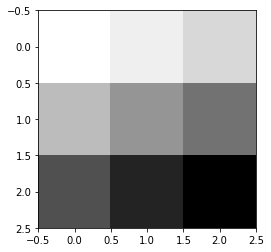

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]], 
                   [[7], [8], [9]]]], dtype=np.float32)
#input인 image는 numpy
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')
# need to reshape the image

## 1 filter (2, 2, 1, 1) with padding: VALID
weight.shape = 1 filter (2, 2, 1, 1) -> 2X2, color 1, 1 filter

In [4]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                    [[[1.]], [[1.]]]]) #Filter
print("weight.shape", weight.shape)

#Kernel1(weight) = tf.Varaible(tf.truncated_normal(shape=[1, 1, 1, 1], stddev=0.1))
    #kernel은 계속해서 학습할 변수 => tf.Variable
    #tf.truncated_normal => 초기화
#Bias1 = tf.Variable(tf.truncated_normal(shape=[4], stddev=0.1))
    #image와 filter를 conv한 후에 같은 사이즈만큼 bias를 더해 줌

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


### Convolution

In [5]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
#tf.nn.conv2d(Input, Filter, Strides, Padding)
    #stride=[batch갯수, height이동, width이동, color]
    #VALID Padding : 딱 가능한 크기로만 계산.
conv2d_img = conv2d.eval() #실행
print("conv2d_img.shape", conv2d_img.shape)
print("orginal>>>>\n", conv2d_img)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("\nswapaxes>>>\n", conv2d_img)
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)
orginal>>>>
 [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]

swapaxes>>>
 [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
conv2d_img.shape (1, 2, 2, 1)


#### np.swapaxes(input array, First axis, Second axis)
<pre>
a = np.arange(8).reshape(2,2,2) 
print np.swapaxes(a, 2, 0)

The original array:
[[[0 1]
 [2 3]]
 [[4 5]
  [6 7]]]

The array after applying the swapaxes function:
[[[0 4]
 [2 6]]
 [[1 5]
  [3 7]]]

[[12. 16.]
 [24. 28.]]


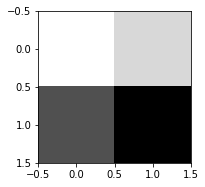

In [6]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap='Greys')

# 1 filter(2, 2, 1, 1) with padding: SAME

In [7]:
print("image.shape", image.shape)

weight = tf.Variable(tf.truncated_normal(shape=[2, 2, 1, 1], stddev=0.1))
weight_2 = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight shape", weight.shape)
print("weight_2 shape", weight_2.shape)

image.shape (1, 3, 3, 1)
weight shape (2, 2, 1, 1)
weight_2 shape (2, 2, 1, 1)


conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


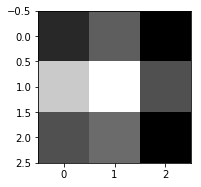

In [8]:
conv2d = tf.nn.conv2d(image, weight_2, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval() #execute convolution computing
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

# 3 filters(2, 2, 1, 3)

In [9]:
print("image.shape", image.shape)

weight = tf.constant([[[[1., 10., -1.]],[[1., 10., -1]]],
                    [[[1., 10., -1.]],[[1., 10., -1]]]])
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)


conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


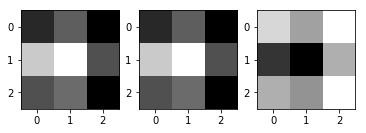

In [20]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval() #execute convolution computing
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')

# Max Pooling

In [63]:
image = np.array([[[[4], [3]],
                [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1] ,padding='SAME')
#ksize = kernel size
print("image.shape",image.shape)
print("pool.shape", pool.shape)
print(image, "\n")
print(pool.eval())

image.shape (1, 2, 2, 1)
pool.shape (1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]] 

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


### ksize vs strides
<pre>
ksize: Filter의 크기 [batch 1개, 2X2, color 1]
strides : [batch 1개, go down 2, go right 2, color 1]

In [79]:
image2 = np.array([[[[1.],[2.],[3.], [4.]],
                  [[5.],[6.], [7.], [8.]],
                 [[9.],[10.], [11.], [12.]]]], dtype=np.float32)
print("image2.shape:", image2.shape)
pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print("pool.shape", pool.shape)
pool2 = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print("pool2.shape", pool2.shape)
pool3 = tf.nn.max_pool(image2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
print("pool3.shape", pool3.shape)
print("\noriginal:\n", image2)
print("\npool:\n", pool.eval())
print("\npool2:\n", pool2.eval())
print("\npool3:\n", pool3.eval())

image2.shape: (1, 3, 4, 1)
pool.shape (1, 3, 4, 1)
pool2.shape (1, 2, 2, 1)
pool3.shape (1, 1, 2, 1)

original:
 [[[[ 1.]
   [ 2.]
   [ 3.]
   [ 4.]]

  [[ 5.]
   [ 6.]
   [ 7.]
   [ 8.]]

  [[ 9.]
   [10.]
   [11.]
   [12.]]]]

pool:
 [[[[ 6.]
   [ 7.]
   [ 8.]
   [ 8.]]

  [[10.]
   [11.]
   [12.]
   [12.]]

  [[10.]
   [11.]
   [12.]
   [12.]]]]

pool2:
 [[[[ 6.]
   [ 8.]]

  [[10.]
   [12.]]]]

pool3:
 [[[[11.]
   [12.]]]]


## import MNIST data

In [24]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


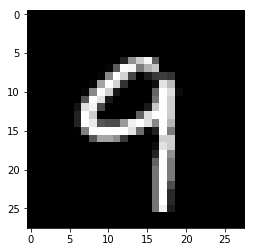

In [29]:
img = mnist.train.images[8].reshape(28, 28)
plt.imshow(img, cmap='gray')

In [31]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1) #-1: None 28X28X1
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev= 0.01)) #3X3X1 5Filters
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d) #28/2 = 14, 5 Filters

Tensor("Conv2D_13:0", shape=(1, 14, 14, 5), dtype=float32)


shape before swapaxes: (1, 14, 14, 5)
shape after swapaxes: (5, 14, 14, 1)


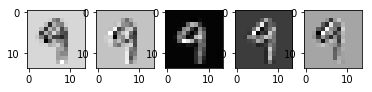

In [39]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
print("shape before swapaxes:", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("shape after swapaxes:", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, 1+i) #nrows, ncols, index
    plt.imshow(one_img.reshape(14, 14), cmap='gray')

Tensor("MaxPool_30:0", shape=(1, 7, 7, 5), dtype=float32)


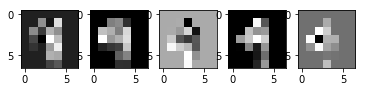

In [72]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(7, 7), cmap='gray')